In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
import plotnine as p9

In [2]:
p9.options.dpi=300
plt.rcParams['svg.fonttype']='none'

In [4]:
bulk_T0_count=pd.read_csv(projectdir+'Bulk_validCount.csv',header=0)

In [6]:
libC_anno_df=pd.read_csv(libC_construct_sequence)

/local/18336806/ipykernel_24620/2374162880.py:1: DtypeWarning: Columns (0,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.


In [7]:
libC_anno_df.columns=['LineageName','SubLibrary','42ntBC','42ntBCrevcomp','LibInsertSequence']

In [8]:
libC_anno_df['bulk_R1_30nt']=libC_anno_df['42ntBC'].str[12:42]

In [9]:
bulk_T0_count=bulk_T0_count.merge(libC_anno_df[['LineageName','bulk_R1_30nt']],how='left',left_on='bulk_R1_30nt',right_on='bulk_R1_30nt')

In [10]:
D0_Lineage=pd.read_csv(projectdir+'T0_OAK/Anndata/OAK1to20_lineage_summary.csv',header=0,sep=',')

In [11]:
df_bulk_sc_D0=D0_Lineage.merge(bulk_T0_count,how='outer',left_on='LineageID',right_on='LineageName')

In [12]:
df_bulk_sc_D0[['T0oak1to20_NumCells','ReadCount']].corr(method="spearman")

,T0oak1to20_NumCells,ReadCount
T0oak1to20_NumCells,1.000000,0.930458
ReadCount,0.930458,1.000000


/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 292 rows containing missing values.


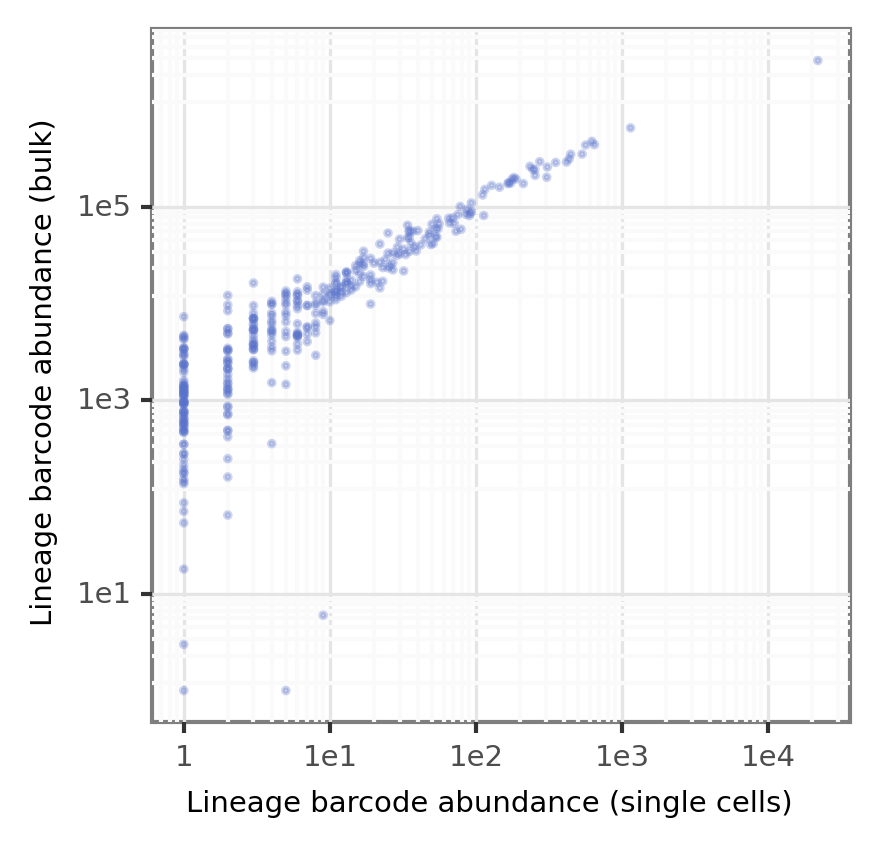

<ggplot: (2932111877542)>

In [13]:
plot=p9.ggplot(data=df_bulk_sc_D0,
           mapping=p9.aes(x='T0oak1to20_NumCells',
                          y='ReadCount',
                         ),
              )
plot+p9.geom_point(alpha=0.3,size=0.3,color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.scales.scale_x_log10() \
+ p9.scales.scale_y_log10() \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.ylab('Lineage barcode abundance (bulk)') \
+ p9.xlab('Lineage barcode abundance (single cells)') \
+ p9.theme(figure_size=(3,3)) # 3 inch

In [14]:
plot=p9.ggplot(data=df_bulk_sc_D0,
           mapping=p9.aes(x='T0oak1to20_NumCells',
                          y='ReadCount',
                         ),
              )
plotsave=plot+p9.geom_point(alpha=0.3,size=0.3,color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.scales.scale_x_log10() \
+ p9.scales.scale_y_log10() \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.ylab('Lineage barcode abundance (bulk)') \
+ p9.xlab('Lineage barcode abundance (single cells)') \
+ p9.theme(figure_size=(3,3)) # 3 inch
plotsave.save('LineageCorrelation.svg',height=3,width=3,format='svg',dpi=300)  

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 3 in image.
/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: LineageCorrelation.svg
/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 292 rows containing missing values.
